In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 

In [2]:
train_df = pd.read_csv('data.csv')

In [3]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
train_df.columns

Index(['High(t-4)', 'Low(t-4)', 'Close_x(t-4)', 'Close_y(t-4)',
       'reddit_sentiment(t-4)', 'twitter_sentiment(t-4)', 'High(t-3)',
       'Low(t-3)', 'Close_x(t-3)', 'Close_y(t-3)', 'reddit_sentiment(t-3)',
       'twitter_sentiment(t-3)', 'High(t-2)', 'Low(t-2)', 'Close_x(t-2)',
       'Close_y(t-2)', 'reddit_sentiment(t-2)', 'twitter_sentiment(t-2)',
       'High(t-1)', 'Low(t-1)', 'Close_x(t-1)', 'Close_y(t-1)',
       'reddit_sentiment(t-1)', 'twitter_sentiment(t-1)', 'High(t)', 'Low(t)',
       'Close_x(t)', 'Close_y(t)', 'reddit_sentiment(t)',
       'twitter_sentiment(t)', 'roe', 'debtToEquity', 'ev/ebitda', 'eps',
       'Close_x1(t+1)'],
      dtype='object')

In [5]:
col_order = ['High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)', 'High(t)', 'Low(t-4)', 'Low(t-3)','Low(t-2)',
            'Low(t-1)', 'Low(t)', 'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)', 'Close_x(t-1)', 'Close_x(t)',
            'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)', 'Close_y(t-1)', 'Close_y(t)', 'reddit_sentiment(t-4)',
            'reddit_sentiment(t-3)', 'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
            'twitter_sentiment(t-4)', 'twitter_sentiment(t-3)', 'twitter_sentiment(t-2)', 'twitter_sentiment(t-1)',
            'twitter_sentiment(t)', 'roe', 'debtToEquity', 'ev/ebitda', 'eps', 'Close_x1(t+1)']

In [6]:
train_df = train_df[col_order]

In [7]:
train_scaled = train_df.copy()

In [8]:
train_scaled.iloc[0][20:]

reddit_sentiment(t-4)      0.000000
reddit_sentiment(t-3)      0.000000
reddit_sentiment(t-2)      0.000000
reddit_sentiment(t-1)      0.000000
reddit_sentiment(t)        0.000000
twitter_sentiment(t-4)     0.137917
twitter_sentiment(t-3)     0.262374
twitter_sentiment(t-2)     0.291613
twitter_sentiment(t-1)     0.280743
twitter_sentiment(t)       0.345201
roe                        0.109210
debtToEquity               2.230663
ev/ebitda                  4.457843
eps                        1.050000
Close_x1(t+1)             43.286526
Name: 0, dtype: float64

In [9]:
trform_list = {}

In [10]:
def minmaxscaler(index, row, in_size, num_var):
    trform_dict = {}
    trformed_row = []
    value = 0
    for i in range(num_var):
        cur = np.array(row[ i*in_size : (i+1)*in_size ])
        rowmaxmin = cur.max() - cur.min()
        print('rowmaxmin', rowmaxmin)
        rowmin = cur.min()
        print('rowmin', rowmin)
        trform_dict[i] = [rowmaxmin, rowmin]
        trform_list[index] = trform_dict
        cur = [ (x - rowmin) / (rowmaxmin) for x in cur]
        trformed_row.extend(cur)
        if (i == 2):
            target = row[-1]
            value = (target - rowmin) / rowmaxmin
    
    rest = np.array(row[ num_var*in_size : -1 ])
    trformed_row.extend(rest)
    trformed_row.append(value)
    return trformed_row

In [11]:
for index, row in train_scaled.iterrows():
    trformed_row = minmaxscaler(index, row, 5, 4)
    train_scaled.loc[index] = trformed_row

rowmaxmin 1.6508996600000003
rowmin 41.3573751
rowmaxmin 4.664516459999994
rowmin 37.12912132
rowmaxmin 1.7284545899999983
rowmin 40.82009888
rowmaxmin 86.31005800000003
rowmin 2709.800049
rowmaxmin 1.6066030100000006
rowmin 41.73315407
rowmaxmin 1.2168728899999977
rowmin 40.57676489
rowmaxmin 2.4664268499999977
rowmin 40.82009888
rowmaxmin 86.31005800000003
rowmin 2709.800049
rowmaxmin 3.8495757499999996
rowmin 41.73315407
rowmaxmin 2.4171728800000025
rowmin 40.98308218
rowmaxmin 4.258487700000003
rowmin 41.23471832
rowmaxmin 57.3398430000002
rowmin 2775.600098
rowmaxmin 5.279552260000003
rowmin 42.55339512
rowmaxmin 3.6874556100000007
rowmin 41.00969678
rowmaxmin 3.510829920000006
rowmin 42.15658188
rowmaxmin 49.639892000000145
rowmin 2783.300049
rowmaxmin 4.824672620000001
rowmin 43.00827476
rowmaxmin 3.6850430499999973
rowmin 41.01210934
rowmaxmin 3.723751059999998
rowmin 42.54855347
rowmaxmin 83.88989200000015
rowmin 2783.300049
rowmaxmin 5.107764160000002
rowmin 43.33975708
rowma

In [12]:
trform_list

{0: {0: [1.6508996600000003, 41.3573751],
  1: [4.664516459999994, 37.12912132],
  2: [1.7284545899999983, 40.82009888],
  3: [86.31005800000003, 2709.800049]},
 1: {0: [1.6066030100000006, 41.73315407],
  1: [1.2168728899999977, 40.57676489],
  2: [2.4664268499999977, 40.82009888],
  3: [86.31005800000003, 2709.800049]},
 2: {0: [3.8495757499999996, 41.73315407],
  1: [2.4171728800000025, 40.98308218],
  2: [4.258487700000003, 41.23471832],
  3: [57.3398430000002, 2775.600098]},
 3: {0: [5.279552260000003, 42.55339512],
  1: [3.6874556100000007, 41.00969678],
  2: [3.510829920000006, 42.15658188],
  3: [49.639892000000145, 2783.300049]},
 4: {0: [4.824672620000001, 43.00827476],
  1: [3.6850430499999973, 41.01210934],
  2: [3.723751059999998, 42.54855347],
  3: [83.88989200000015, 2783.300049]},
 5: {0: [5.107764160000002, 43.33975708],
  1: [5.214226759999995, 41.01210934],
  2: [5.129543300000002, 43.28652573],
  3: [112.46997099999999, 2783.300049]},
 6: {0: [3.498732060000002, 45.

In [13]:
train_scaled

,High(t-4),High(t-3),High(t-2),High(t-1),High(t),Low(t-4),Low(t-3),Low(t-2),Low(t-1),Low(t),...,twitter_sentiment(t-4),twitter_sentiment(t-3),twitter_sentiment(t-2),twitter_sentiment(t-1),twitter_sentiment(t),roe,debtToEquity,ev/ebitda,eps,Close_x1(t+1)
0,0.000000,0.570606,0.227621,0.724466,1.000000,0.000000,0.739121,0.826229,0.831935,1.000000,...,0.137917,0.262374,0.291613,0.280743,0.345201,0.109210,2.230663,4.457843,1.050,1.426955
1,0.352442,0.000000,0.510544,0.793675,1.000000,0.000000,0.333903,0.355774,1.000000,0.357757,...,0.262374,0.291613,0.280743,0.345201,0.213995,0.109210,2.230663,4.457843,1.050,1.894687
2,0.000000,0.213073,0.331237,0.417345,1.000000,0.000000,0.011011,0.335332,0.012009,1.000000,...,0.291613,0.280743,0.345201,0.213995,0.283504,0.109210,2.230663,4.457843,1.050,1.040908
3,0.000000,0.086159,0.148945,0.573786,1.000000,0.000000,0.212597,0.000654,0.648295,1.000000,...,0.280743,0.345201,0.213995,0.283504,0.259652,0.109210,2.230663,4.457843,1.050,1.172293
4,0.000000,0.068706,0.533602,1.000000,0.758775,0.212081,0.000000,0.648065,1.000000,0.990150,...,0.345201,0.213995,0.283504,0.259652,0.213035,0.109210,2.230663,4.457843,1.050,1.575700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.000000,0.705911,0.000000,0.475632,0.222729,0.811659,0.000000,0.036068,1.000000,0.769025,...,0.226419,0.140308,0.239292,0.125853,0.086957,0.504836,5.282353,3.744930,1.272,0.551543
196,1.000000,0.000000,0.673784,0.315520,0.130279,0.000000,0.036068,1.000000,0.769025,0.516367,...,0.140308,0.239292,0.125853,0.086957,0.064787,0.528813,5.112557,2.692085,1.290,0.604801
197,0.473767,1.000000,0.720192,0.575517,0.000000,0.000000,1.000000,0.760382,0.498271,0.467994,...,0.239292,0.125853,0.086957,0.064787,0.141762,0.528813,5.112557,2.692085,1.290,-2.918726
198,1.000000,0.720192,0.575517,0.000000,0.424484,1.000000,0.813217,0.608901,0.585300,0.000000,...,0.125853,0.086957,0.064787,0.141762,0.124669,0.528813,5.112557,2.692085,1.290,-0.032608


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_scaled.drop('Close_x1(t+1)',axis=1), train_scaled['Close_x1(t+1)'] ,
                                   random_state=88, 
                                   test_size=0.25, 
                                   shuffle=False)

In [15]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [16]:
y_train

114   -0.045749
62     1.019220
33     1.391923
107    0.440071
7      1.005068
         ...   
9     -1.460544
103    0.107142
67     1.566539
117    0.167418
47     0.629913
Name: Close_x1(t+1), Length: 150, dtype: float64

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# define a function to create the LSTM model
def create_model(units=100, dropout=0.2):
    LSTM_model = keras.Sequential()
    LSTM_model.add(layers.Embedding(input_dim=5000, output_dim=32))
    LSTM_model.add(layers.LSTM(units, dropout=dropout))
    LSTM_model.add(layers.Dense(1, activation='linear'))
    LSTM_model.compile(optimizer='adam', loss='mse')
    return LSTM_model

# create a KerasRegressor object
regressor = KerasRegressor(build_fn=create_model, verbose=0)

# define the hyperparameters to search over
param_grid = {
    'units': [100, 150, 200, 250],
    'dropout': [0.1, 0.2, 0.3],
}

C:\Users\joshu\AppData\Local\Temp\ipykernel_49276\2973061294.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=create_model, verbose=0)


In [18]:
# create a GridSearchCV object
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
# fit the grid search object to the data
grid_result = grid.fit(X_train, y_train, epochs=30, batch_size=1)

In [19]:
from sklearn.metrics import mean_squared_error
# Print results
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

# Use best model to make predictions
best_model = grid.best_estimator_
predictions = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print(f'Mean squared error: {mse}')

Best parameters: {'dropout': 0.2, 'units': 250}
Best score: -0.5220282150437324
Mean squared error: 1.1693941639288499


In [20]:
cv_results = grid.cv_results_
for mean_score, std_score, params in zip(cv_results['mean_test_score'], cv_results['std_test_score'], cv_results['params']):
    print(f'Mean score: {mean_score:.3f}, Standard deviation: {std_score:.3f}, Parameters: {params}')

Mean score: -0.535, Standard deviation: 0.152, Parameters: {'dropout': 0.1, 'units': 100}
Mean score: -0.550, Standard deviation: 0.158, Parameters: {'dropout': 0.1, 'units': 150}
Mean score: -0.546, Standard deviation: 0.135, Parameters: {'dropout': 0.1, 'units': 200}
Mean score: -0.533, Standard deviation: 0.144, Parameters: {'dropout': 0.1, 'units': 250}
Mean score: -0.549, Standard deviation: 0.141, Parameters: {'dropout': 0.2, 'units': 100}
Mean score: -0.561, Standard deviation: 0.139, Parameters: {'dropout': 0.2, 'units': 150}
Mean score: -0.552, Standard deviation: 0.129, Parameters: {'dropout': 0.2, 'units': 200}
Mean score: -0.522, Standard deviation: 0.152, Parameters: {'dropout': 0.2, 'units': 250}
Mean score: -0.535, Standard deviation: 0.153, Parameters: {'dropout': 0.3, 'units': 100}
Mean score: -0.543, Standard deviation: 0.162, Parameters: {'dropout': 0.3, 'units': 150}
Mean score: -0.528, Standard deviation: 0.162, Parameters: {'dropout': 0.3, 'units': 200}
Mean score

In [21]:
pred_trformed = [ predictions[x-150] * trform_list[x][2][0] + trform_list[x][2][1] for x in y_test.index ]

In [22]:
y_trformed =  [ y_test[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in y_test.index ]

In [23]:
mean_squared_error(y_trformed, pred_trformed)

187.73799401085188

In [24]:
validation_pred = best_model.predict(train_scaled.drop('Close_x1(t+1)',axis=1))

In [25]:
validation_y = train_scaled['Close_x1(t+1)']

In [26]:
v_pred_trformed = [ validation_pred[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]

In [27]:
v_y_trformed = [ validation_y[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]

In [43]:
from sklearn.metrics import r2_score
r2_score(v_y_trformed, v_pred_trformed)

0.9573976429860513

<Axes: >

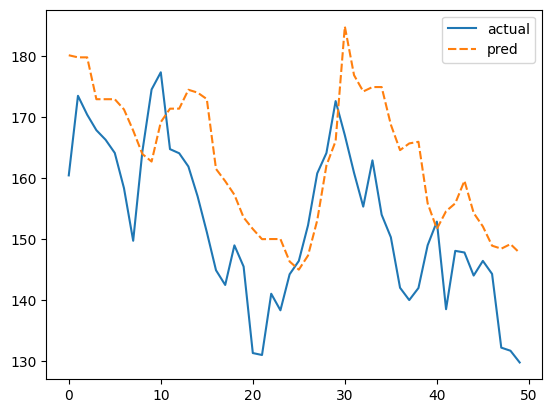

In [28]:
output = pd.DataFrame({'actual': y_trformed, 'pred': pred_trformed })
sns.lineplot(data=output)

<Axes: >

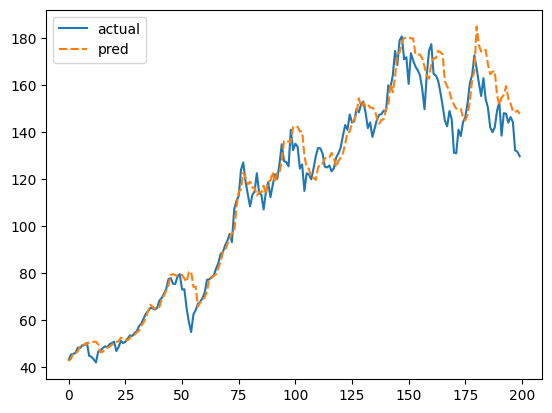

In [29]:
output = pd.DataFrame({'actual': v_y_trformed, 'pred': v_pred_trformed })
sns.lineplot(data=output)